In [17]:
#IMPORTAR LIBRERÍAS
#Advertencias
import warnings
warnings.filterwarnings('ignore')

#Tratamiento de datos
import numpy as np
import pandas as pd
import statsmodels.api as sm 

#Gráficos
import matplotlib.pyplot as plt
import seaborn as sb
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

#Preparación de datos
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn import set_config

#Modelado y pronóstico
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text

from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster

#Búsqueda hiperparámetros
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#Evaluación
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

In [2]:
#IMPORTAR DATOS
datos = pd.read_csv(r'C:\Users\maria\Downloads\punto1.csv')

In [4]:
datos.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0


In [5]:
datos.tail()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
45523,CST_130421,Doris,55,F,N,N,2.0,96207.57,117.0,Unknown,4.0,0.0,11229.54,29663.83,82,907.0,0,0,0
45524,CST_136670,Luciana,31,F,N,Y,0.0,383476.74,966.0,Accountants,2.0,1.0,43369.91,139947.16,32,679.0,0,0,0
45525,CST_145435,Jessica,27,F,N,Y,0.0,260052.18,1420.0,Core staff,2.0,0.0,22707.51,83961.83,46,727.0,0,0,0
45526,CST_130913,Tessa,32,M,Y,N,0.0,157363.04,2457.0,Laborers,2.0,0.0,20150.10,25538.72,92,805.0,0,0,0
45527,CST_160078,Gopinath,38,M,N,Y,1.0,316896.28,1210.0,Unknown,3.0,0.0,34603.78,36630.76,26,682.0,0,0,0


In [6]:
#EXPLORACIÓN DE DATOS
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45528 entries, 0 to 45527
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              45528 non-null  object 
 1   name                     45528 non-null  object 
 2   age                      45528 non-null  int64  
 3   gender                   45528 non-null  object 
 4   owns_car                 44981 non-null  object 
 5   owns_house               45528 non-null  object 
 6   no_of_children           44754 non-null  float64
 7   net_yearly_income        45528 non-null  float64
 8   no_of_days_employed      45065 non-null  float64
 9   occupation_type          45528 non-null  object 
 10  total_family_members     45445 non-null  float64
 11  migrant_worker           45441 non-null  float64
 12  yearly_debt_payments     45433 non-null  float64
 13  credit_limit             45528 non-null  float64
 14  credit_limit_used(%)  

In [12]:
#Imputar datos nulos con la moda
modaOwnsCar = datos['owns_car'].mode()

modaNoChildren = datos['no_of_children'].mode()

modaDaysEmployed = datos['no_of_days_employed'].mode()

modaFamilyMembers = datos['total_family_members'].mode()

modaMigrantWorker = datos['migrant_worker'].mode()

modaYDebtPay = datos['yearly_debt_payments'].mode()

modaCreditScore = datos['credit_score'].mode()


In [14]:
datos['owns_car'].fillna(modaOwnsCar[0], inplace = True)
datos['no_of_children'].fillna(modaNoChildren[0], inplace = True)
datos['no_of_days_employed'].fillna(modaDaysEmployed[0], inplace = True)
datos['total_family_members'].fillna(modaFamilyMembers[0], inplace = True)
datos['migrant_worker'].fillna(modaMigrantWorker[0], inplace = True)
datos['yearly_debt_payments'].fillna(modaYDebtPay[0], inplace = True)
datos['credit_score'].fillna(modaCreditScore[0], inplace = True)

In [15]:
#EXPLORACIÓN ESTADÍSTICA DE DATOS
datos.describe()

,age,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
count,45528.000000,45528.000000,4.552800e+04,45528.000000,45528.000000,45528.000000,45528.000000,4.552800e+04,45528.00000,45528.000000,45528.000000,45528.000000,45528.000000
mean,38.993411,0.413504,2.006556e+05,70636.125461,2.157793,0.178769,31746.471907,4.354842e+04,52.23502,782.771437,0.060710,0.050540,0.081203
std,9.543990,0.719972,6.690740e+05,141793.489407,0.910766,0.383163,17287.003413,1.487847e+05,29.37691,100.622012,0.264629,0.219059,0.273149
min,23.000000,0.000000,2.717061e+04,2.000000,1.000000,0.000000,2237.470000,4.003140e+03,0.00000,500.000000,0.000000,0.000000,0.000000
25%,31.000000,0.000000,1.263458e+05,946.750000,2.000000,0.000000,19154.175000,2.397381e+04,27.00000,704.000000,0.000000,0.000000,0.000000
50%,39.000000,0.000000,1.717149e+05,2261.000000,2.000000,0.000000,29049.045000,3.568804e+04,54.00000,786.000000,0.000000,0.000000,0.000000
75%,47.000000,1.000000,2.406038e+05,6206.000000,3.000000,0.000000,40535.472500,5.343576e+04,78.00000,867.000000,0.000000,0.000000,0.000000
max,55.000000,9.000000,1.407590e+08,365252.000000,10.000000,1.000000,328112.860000,3.112997e+07,99.00000,949.000000,2.000000,1.000000,1.000000


In [16]:
datos.describe(include = 'object')

,customer_id,name,gender,owns_car,owns_house,occupation_type
count,45528,45528,45528,45528,45528,45528
unique,45528,4010,3,2,2,19
top,CST_115179,Jonathan,F,N,Y,Unknown
freq,1,207,29957,30290,31642,14299


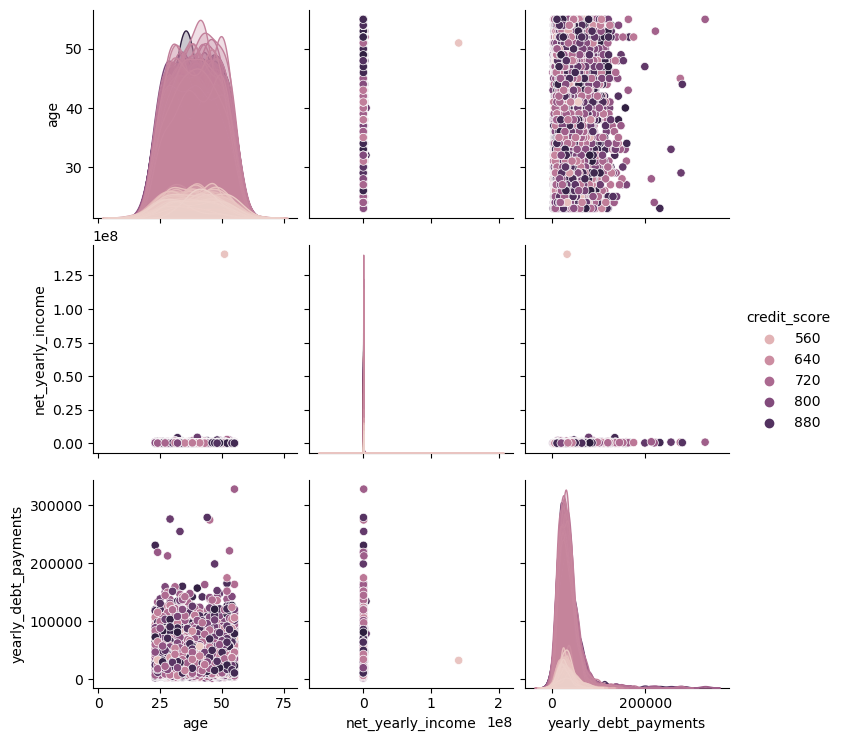

In [18]:
sb.pairplot(data = datos, vars = ['age', 'net_yearly_income', 'yearly_debt_payments'], hue = 'credit_score', kind = 'scatter')

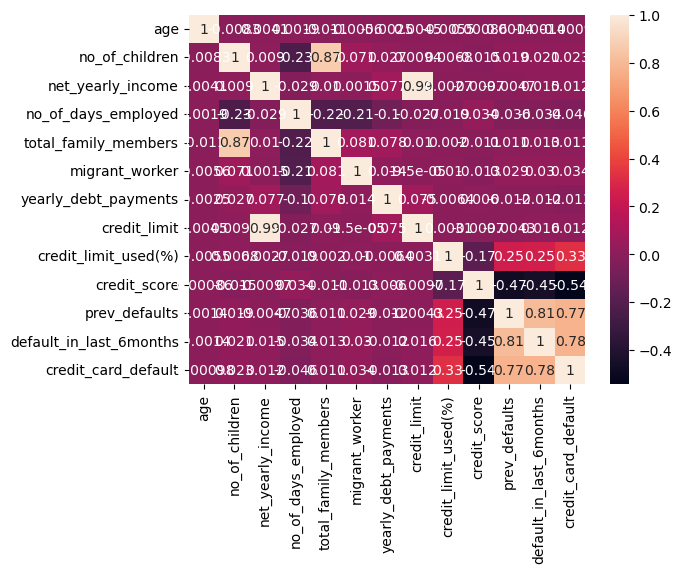

In [19]:
sb.heatmap(datos.corr(), annot = True)
plt.show()

In [22]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45528 entries, 0 to 45527
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              45528 non-null  object 
 1   name                     45528 non-null  object 
 2   age                      45528 non-null  int64  
 3   gender                   45528 non-null  object 
 4   owns_car                 45528 non-null  object 
 5   owns_house               45528 non-null  object 
 6   no_of_children           45528 non-null  float64
 7   net_yearly_income        45528 non-null  float64
 8   no_of_days_employed      45528 non-null  float64
 9   occupation_type          45528 non-null  object 
 10  total_family_members     45528 non-null  float64
 11  migrant_worker           45528 non-null  float64
 12  yearly_debt_payments     45528 non-null  float64
 13  credit_limit             45528 non-null  float64
 14  credit_limit_used(%)  

In [23]:
#PREPARACIÓN DE DATOS
x = datos.drop('credit_card_default', axis = 1)
y = datos['credit_card_default']

In [44]:
numCols = x.select_dtypes(include = ['float64', 'int64']).columns.to_list()
matCols = x[['gender', 'owns_car', 'owns_house']].columns.to_list()
ordCols = x[['customer_id', 'name','occupation_type']].columns.to_list()

In [45]:
numCols

['age',
 'no_of_children',
 'net_yearly_income',
 'no_of_days_employed',
 'total_family_members',
 'migrant_worker',
 'yearly_debt_payments',
 'credit_limit',
 'credit_limit_used(%)',
 'credit_score',
 'prev_defaults',
 'default_in_last_6months']

In [46]:
matCols

['gender', 'owns_car', 'owns_house']

In [47]:
ordCols

['customer_id', 'name', 'occupation_type']

In [48]:
numTransformer = Pipeline(steps = [('scaler', MinMaxScaler())])
matTransformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown = 'ignore'))])
ordTransformer = Pipeline(steps = [('ordinal', OrdinalEncoder(handle_unknown = 'error'))])

In [49]:
preprocesador = ColumnTransformer(transformers = [
    ('numeric', numTransformer, numCols),
    ('catOhe', matTransformer, matCols),
    ('catOrd', ordTransformer, ordCols)
], remainder = 'passthrough')

set_config(display = 'diagram')
preprocesador

ColumnTransformer(remainder='passthrough',
                  transformers=[('numeric',
                                 Pipeline(steps=[('scaler', MinMaxScaler())]),
                                 ['age', 'no_of_children', 'net_yearly_income',
                                  'no_of_days_employed', 'total_family_members',
                                  'migrant_worker', 'yearly_debt_payments',
                                  'credit_limit', 'credit_limit_used(%)',
                                  'credit_score', 'prev_defaults',
                                  'default_in_last_6months']),
                                ('catOhe',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['gender', 'owns_car', 'owns_house']),
                                ('catOrd',
                                 Pipeline(steps=[('ordinal',
                                                  OrdinalEncoder())]),
                                 ['customer_id', 'name', 'occupation_type'])])

In [50]:
xpre = preprocesador.fit_transform(x)
xpre

array([[7.18750000e-01, 0.00000000e+00, 5.73881709e-04, ...,
        1.04120000e+04, 3.93900000e+03, 1.70000000e+01],
       [1.87500000e-01, 0.00000000e+00, 5.87585643e-04, ...,
        1.49930000e+04, 1.70000000e+02, 8.00000000e+00],
       [4.37500000e-01, 0.00000000e+00, 1.44233570e-03, ...,
        6.40400000e+03, 3.55700000e+03, 8.00000000e+00],
       ...,
       [1.25000000e-01, 0.00000000e+00, 1.65478947e-03, ...,
        3.14010000e+04, 1.59400000e+03, 3.00000000e+00],
       [2.81250000e-01, 0.00000000e+00, 9.25109968e-04, ...,
        2.13250000e+04, 3.43900000e+03, 8.00000000e+00],
       [4.68750000e-01, 1.11111111e-01, 2.05870729e-03, ...,
        4.14800000e+04, 1.26700000e+03, 1.70000000e+01]])

In [51]:
codCat = preprocesador.named_transformers_['catOhe']['onehot'].get_feature_names(matCols)
codCat

array(['gender_F', 'gender_M', 'gender_XNA', 'owns_car_N', 'owns_car_Y',
       'owns_house_N', 'owns_house_Y'], dtype=object)

In [52]:
labels = np.concatenate([numCols, codCat, ordCols])
labels

array(['age', 'no_of_children', 'net_yearly_income',
       'no_of_days_employed', 'total_family_members', 'migrant_worker',
       'yearly_debt_payments', 'credit_limit', 'credit_limit_used(%)',
       'credit_score', 'prev_defaults', 'default_in_last_6months',
       'gender_F', 'gender_M', 'gender_XNA', 'owns_car_N', 'owns_car_Y',
       'owns_house_N', 'owns_house_Y', 'customer_id', 'name',
       'occupation_type'], dtype=object)

In [53]:
xpro = pd.DataFrame(xpre, columns = labels)
xpro.head()

,age,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,...,gender_F,gender_M,gender_XNA,owns_car_N,owns_car_Y,owns_house_N,owns_house_Y,customer_id,name,occupation_type
0,0.71875,0.0,0.000574,0.001670,0.000000,1.0,0.094615,0.000472,0.737374,0.097996,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,10412.0,3939.0,17.0
1,0.18750,0.0,0.000588,0.007581,0.111111,0.0,0.040175,0.001084,0.525253,0.795100,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,14993.0,170.0,8.0
2,0.43750,0.0,0.001442,0.000553,0.111111,0.0,0.141708,0.001208,0.434343,0.334076,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,6404.0,3557.0,8.0
3,0.50000,0.0,0.000676,0.032687,0.111111,0.0,0.062407,0.000920,0.202020,0.565702,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,19491.0,2899.0,3.0
4,0.71875,0.0,0.002559,0.003989,0.000000,0.0,0.110611,0.001573,0.757576,0.951002,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,35467.0,2289.0,3.0


In [54]:
xpro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45528 entries, 0 to 45527
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      45528 non-null  float64
 1   no_of_children           45528 non-null  float64
 2   net_yearly_income        45528 non-null  float64
 3   no_of_days_employed      45528 non-null  float64
 4   total_family_members     45528 non-null  float64
 5   migrant_worker           45528 non-null  float64
 6   yearly_debt_payments     45528 non-null  float64
 7   credit_limit             45528 non-null  float64
 8   credit_limit_used(%)     45528 non-null  float64
 9   credit_score             45528 non-null  float64
 10  prev_defaults            45528 non-null  float64
 11  default_in_last_6months  45528 non-null  float64
 12  gender_F                 45528 non-null  float64
 13  gender_M                 45528 non-null  float64
 14  gender_XNA            

In [55]:
#Separación en entrenamiento y prueba
xEntrenamiento, xPrueba, yEntrenamiento, yPrueba = train_test_split(xpro, y, train_size = 0.7, random_state = 123)

In [56]:
xEntrenamiento.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31869 entries, 10731 to 15725
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      31869 non-null  float64
 1   no_of_children           31869 non-null  float64
 2   net_yearly_income        31869 non-null  float64
 3   no_of_days_employed      31869 non-null  float64
 4   total_family_members     31869 non-null  float64
 5   migrant_worker           31869 non-null  float64
 6   yearly_debt_payments     31869 non-null  float64
 7   credit_limit             31869 non-null  float64
 8   credit_limit_used(%)     31869 non-null  float64
 9   credit_score             31869 non-null  float64
 10  prev_defaults            31869 non-null  float64
 11  default_in_last_6months  31869 non-null  float64
 12  gender_F                 31869 non-null  float64
 13  gender_M                 31869 non-null  float64
 14  gender_XNA        

In [57]:
#MODELADO
modelo = SVC()
modelo.fit(xEntrenamiento, yEntrenamiento)

SVC()

In [60]:
#EVALUACIÓN
predSVCEntrenamiento = modelo.predict(xEntrenamiento)
predSVCPrueba = modelo.predict(xPrueba)
accuracySVCEntrenamiento = accuracy_score(yEntrenamiento, predSVCEntrenamiento)
accuracySVCPrueba = accuracy_score(yPrueba, predSVCPrueba)
print(f'El accuracy en Entrenamiento es: {accuracySVCEntrenamiento}')
print(f'El accuracy en Prueba es: {accuracySVCPrueba}')

El accuracy en Entrenamiento es: 0.91992218143023
El accuracy en Prueba es: 0.9161724870049052


In [61]:
#MODELADO 2
modelo2 = MLPClassifier(hidden_layer_sizes = (10, 50, 10), learning_rate_init = 0.01)
modelo2.fit(xEntrenamiento, yEntrenamiento)

MLPClassifier(hidden_layer_sizes=(10, 50, 10), learning_rate_init=0.01)

In [64]:
#EVALUACIÓN
predMLPEntrenamiento = modelo2.predict(xEntrenamiento)
predMLPPrueba = modelo2.predict(xPrueba)
accuracyMLPEntrenamiento = accuracy_score(yEntrenamiento, predMLPEntrenamiento)
accuracyMLPPrueba = accuracy_score(yPrueba, predMLPPrueba)
print(f'El accuracy en Entrenamiento es: {accuracyMLPEntrenamiento}')
print(f'El accuracy en Prueba es: {accuracyMLPPrueba}')

El accuracy en Entrenamiento es: 0.91992218143023
El accuracy en Prueba es: 0.9161724870049052
